In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

## <bold>Data Cleaning 

In [2]:
#Load ther dataset for cleaning
df = pd.read_csv('datasets/customer_dataset.csv')

In [3]:
english_cities = ['London', 'Manchester', 'Liverpool', 'Birmingham', 'Leeds', 'Sheffield', 
                  'Bradford', 'Coventry', 'Nottingham', 'Newcastle', 'Hull', 'Leicester']

# Add a new column 'City of Living' with random city names from the list
df['City_of_Living'] = [random.choice(english_cities) for _ in range(len(df))]


print(df.head())

            Transaction ID Railcard       Name Surname  Age Gender  \
0  da8a6ba8-b3dc-4677-b176    ADuLT  Nathaniel   Smith   25   Male   
1  b0cdd1b0-f214-4197-be53    AdULt       Cole  Nelson   26   Male   
2  f3ba7a96-f713-40d9-9629     nOnE     Oliver    Reed   23   Male   
3  b2471f11-4fe7-4c87-8ab4     NONe      Jacob  Barnes   64   Male   
4  2be00b45-0762-485e-a7a3     nONe    Zachary  Harris   37   Male   

  City_of_Living  
0       Bradford  
1           Hull  
2       Bradford  
3      Sheffield  
4     Nottingham  


### Basic exploreation of dataset

In [4]:
df.head()

,Transaction ID,Railcard,Name,Surname,Age,Gender,City_of_Living
0,da8a6ba8-b3dc-4677-b176,ADuLT,Nathaniel,Smith,25,Male,Bradford
1,b0cdd1b0-f214-4197-be53,AdULt,Cole,Nelson,26,Male,Hull
2,f3ba7a96-f713-40d9-9629,nOnE,Oliver,Reed,23,Male,Bradford
3,b2471f11-4fe7-4c87-8ab4,NONe,Jacob,Barnes,64,Male,Sheffield
4,2be00b45-0762-485e-a7a3,nONe,Zachary,Harris,37,Male,Nottingham


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32291 entries, 0 to 32290
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Transaction ID  30679 non-null  object
 1   Railcard        30932 non-null  object
 2   Name            32291 non-null  object
 3   Surname         32291 non-null  object
 4   Age             32291 non-null  int64 
 5   Gender          32291 non-null  object
 6   City_of_Living  32291 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.7+ MB


In [6]:
print(f"Num of rows {df.shape[0]} and num of columns {df.shape[1]}")
print('-------------')

print(f'Num of Null values \n{df.isna().sum()}')
print('-------------')

print(f'Num of dupluicated values {df.duplicated().sum()}')

Num of rows 32291 and num of columns 7
-------------
Num of Null values 
Transaction ID    1612
Railcard          1359
Name                 0
Surname              0
Age                  0
Gender               0
City_of_Living       0
dtype: int64
-------------
Num of dupluicated values 0


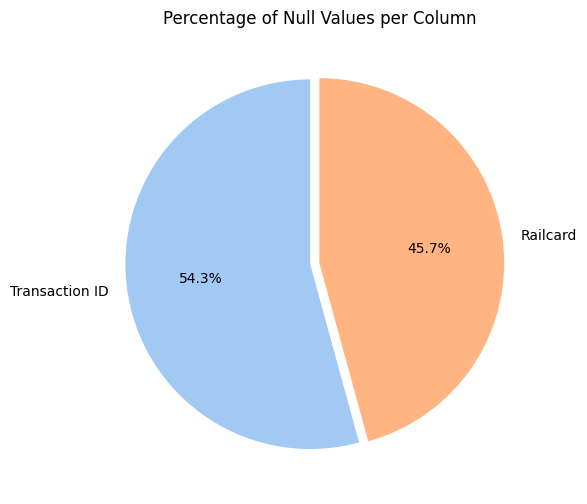

In [7]:
#Calaculate procentage of missing values ber columns
null_percentage = (df.isnull().sum() / len(df))*100
null_percentage = null_percentage.loc[null_percentage > 0 ]


colors = sns.color_palette("pastel", len(null_percentage))

plt.figure(figsize=(10, 6))
plt.pie(
    null_percentage,
    labels=null_percentage.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=[0.05 if i == null_percentage.max() else 0 for i in null_percentage],
)
plt.title("Percentage of Null Values per Column")
plt.show()

In [8]:
df['Age'].describe()

count    32291.000000
mean        36.572110
std         19.632592
min          3.000000
25%         20.000000
50%         37.000000
75%         54.000000
max         70.000000
Name: Age, dtype: float64

In [9]:
df.head()

,Transaction ID,Railcard,Name,Surname,Age,Gender,City_of_Living
0,da8a6ba8-b3dc-4677-b176,ADuLT,Nathaniel,Smith,25,Male,Bradford
1,b0cdd1b0-f214-4197-be53,AdULt,Cole,Nelson,26,Male,Hull
2,f3ba7a96-f713-40d9-9629,nOnE,Oliver,Reed,23,Male,Bradford
3,b2471f11-4fe7-4c87-8ab4,NONe,Jacob,Barnes,64,Male,Sheffield
4,2be00b45-0762-485e-a7a3,nONe,Zachary,Harris,37,Male,Nottingham


In [10]:
# Clean Name
df['Name'] = df['Name'].str.capitalize().str.strip()

#Clear Surname
df['Surname'] = df['Surname'].str.capitalize().str.strip()

In [11]:
#Drop transaction with null values
df.dropna(subset=['Transaction ID'],inplace=True)

print(df['Transaction ID'].isna().sum())

0


In [12]:
#clear Railcard
df['Railcard'] = df['Railcard'].str.capitalize().str.strip()


def Mod_railcard(x,y):
    # check if Railcard disabled to save it 
    if y == 'Disabled':
        return 'Disabled'
    
    if x < 15:
        return "Child"
    elif x >= 15 and x < 25:
        return 'Student'
    elif x >= 25 and x < 60:
        return 'Adult'
    return 'Senior'



df['Railcard'] = df.apply(lambda x: Mod_railcard(x['Age'], x['Railcard']),axis=1)


print(f'Total by {df['Railcard'].value_counts()}')

Total by Railcard
Adult       14306
Child        4799
Senior       4498
Student      4069
Disabled     3007
Name: count, dtype: int64


In [13]:
#Display that dataset does not have a missing values
print(f'Null values: \n{df.isna().sum()}')

Null values: 
Transaction ID    0
Railcard          0
Name              0
Surname           0
Age               0
Gender            0
City_of_Living    0
dtype: int64


# Explore Dataset


### Histogram chart for distribution by age and Gedner

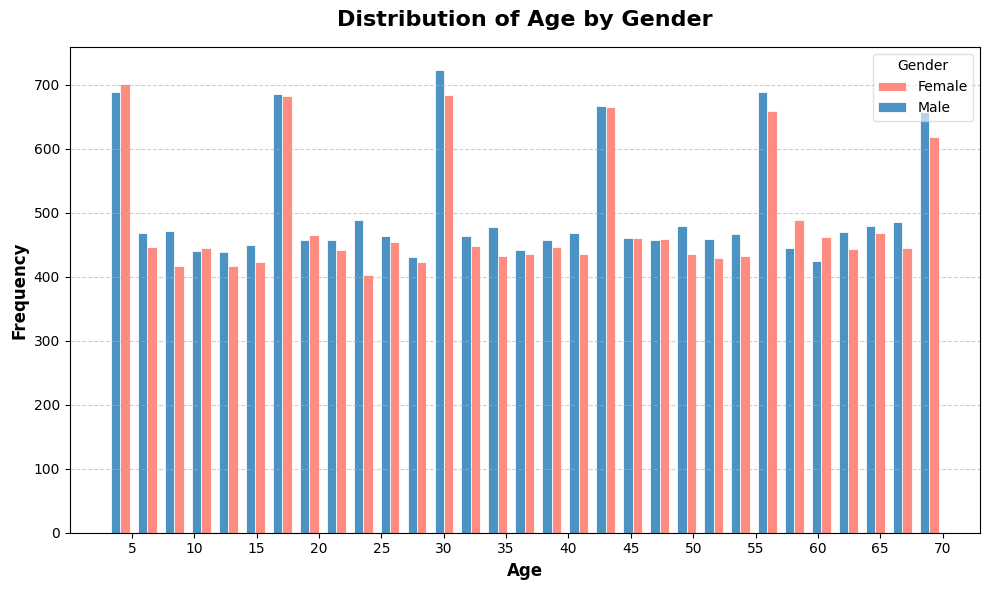

In [14]:
custom_palette = {'Female': '#ff6f61', 'Male': '#1f77b4'}

plt.figure(figsize=(10,6))
sns.histplot(
    data=df,
    x='Age',
    hue='Gender',
    multiple='dodge',
    shrink=0.7,
    edgecolor='white',
    palette=custom_palette,
    alpha=0.8
)


plt.xticks(range(5, 71, 5), fontsize=10)
plt.yticks(fontsize=10)
plt.title('Distribution of Age by Gender', fontsize=16, weight='bold', pad=15)
plt.xlabel('Age', fontsize=12, weight='bold')
plt.ylabel('Frequency', fontsize=12, weight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Gender', labels=['Female', 'Male'], loc='upper right', framealpha=0.6)
plt.tight_layout()
plt.show()

/var/folders/xc/jhj64_2d715g6wbxh3q389fh0000gp/T/ipykernel_43001/78502703.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=Total_railcard, x='Type of Railcard', y='Count', palette='Spectral')


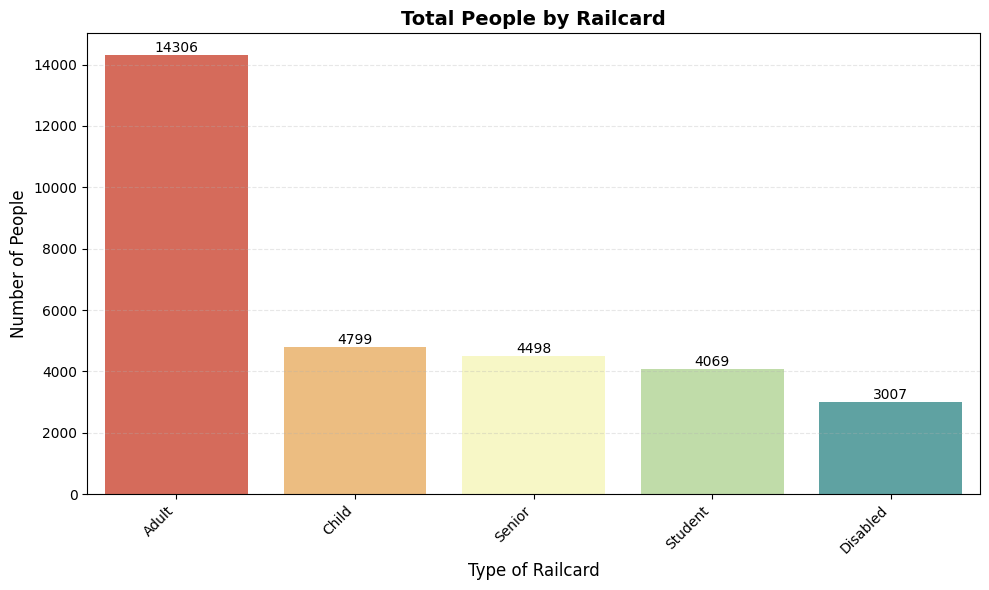

In [15]:
Total_railcard = df['Railcard'].value_counts().reset_index()
Total_railcard.columns = ['Type of Railcard', 'Count']


plt.figure(figsize=(10, 6))
ax = sns.barplot(data=Total_railcard, x='Type of Railcard', y='Count', palette='Spectral')

for bar in ax.containers:
    ax.bar_label(bar, fmt='%d', label_type='edge', fontsize=10, color='black')

ax.grid(axis='y', linestyle='--', alpha=0.3)


plt.title('Total People by Railcard', fontsize=14, weight='bold')
plt.xlabel('Type of Railcard', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  

plt.tight_layout() 
plt.show()

In [16]:
df.rename(columns={'Transaction ID':'Transaction_ID'},inplace=True)

In [17]:
df.head()

,Transaction_ID,Railcard,Name,Surname,Age,Gender,City_of_Living
0,da8a6ba8-b3dc-4677-b176,Adult,Nathaniel,Smith,25,Male,Bradford
1,b0cdd1b0-f214-4197-be53,Adult,Cole,Nelson,26,Male,Hull
2,f3ba7a96-f713-40d9-9629,Student,Oliver,Reed,23,Male,Bradford
3,b2471f11-4fe7-4c87-8ab4,Senior,Jacob,Barnes,64,Male,Sheffield
4,2be00b45-0762-485e-a7a3,Adult,Zachary,Harris,37,Male,Nottingham


In [19]:
df

,Transaction_ID,Railcard,Name,Surname,Age,Gender,City_of_Living
0,da8a6ba8-b3dc-4677-b176,Adult,Nathaniel,Smith,25,Male,Bradford
1,b0cdd1b0-f214-4197-be53,Adult,Cole,Nelson,26,Male,Hull
2,f3ba7a96-f713-40d9-9629,Student,Oliver,Reed,23,Male,Bradford
3,b2471f11-4fe7-4c87-8ab4,Senior,Jacob,Barnes,64,Male,Sheffield
4,2be00b45-0762-485e-a7a3,Adult,Zachary,Harris,37,Male,Nottingham
...,...,...,...,...,...,...,...
32285,45ecda58-e708-4ec4-9ed9,Senior,Lucas,Turner,70,Male,London
32286,3d556ebe-ed91-4adc-804f,Disabled,Savannah,Moore,36,Female,Sheffield
32287,23e66537-2ce9-40d6-91d3,Adult,Andrew,Harris,50,Male,Coventry
32288,54d121f4-3e4d-416a-8bd7,Adult,Ruby,Evans,32,Female,Coventry


### Import cleaned Dataset to SQL


In [20]:
from sqlalchemy import create_engine

DATABASE = "postgres"
USER = "postgres"
PASSWORD = "1234"
HOST = "localhost"
PORT = "5433"

# create a connect to local Database
engine = create_engine(f"postgresql://{USER}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}")
TABLE_NAME = "Customers"
df.to_sql(TABLE_NAME, engine, if_exists="replace", index=False)
print(f"DataFrame was import '{TABLE_NAME}'!")

InternalError: (psycopg2.errors.DependentObjectsStillExist) cannot drop table "Customers" because other objects depend on it
DETAIL:  view customer_purchase_history depends on table "Customers"
HINT:  Use DROP ... CASCADE to drop the dependent objects too.

[SQL: 
DROP TABLE "Customers"]
(Background on this error at: https://sqlalche.me/e/20/2j85)

In [21]:
df.to_csv('dataset_cleaned/Customers_cleaned.csv',index=False)